In [80]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
subspecies = pd.read_csv("Data/mgSs.coverage.stats.csv").rename(columns={"Unnamed: 0" : "subspecies"})
subspecies = subspecies['subspecies']
taxaKey = pd.read_csv("/Users/amaros/Desktop/mgss2/VIRGO2_taxaKey.csv")

def lighter_colors(base_color, num_colors):
    # Convert the base color to its RGB components
    r = int(base_color[1:3], 16)
    g = int(base_color[3:5], 16)
    b = int(base_color[5:7], 16)

    # Calculate the step values for degrading
    r_step = (255 - r) / num_colors
    g_step = (255 - g) / num_colors
    b_step = (255 - b) / num_colors

    # Generate the progressively lighter colors
    lighter_colors = []
    for i in range(num_colors):
        new_r = int(r + i * r_step)
        new_g = int(g + i * g_step)
        new_b = int(b + i * b_step)
        lighter_colors.append(f'#{new_r:02X}{new_g:02X}{new_b:02X}')

    return lighter_colors

# Example usage:
base_color = "#FF0000"
num_colors = 5
lighter_colors_list = lighter_colors(base_color, num_colors)
print(lighter_colors_list)


species = subspecies.apply(lambda x : x.split(".")[0])
couleur = []
for i,j in zip(list(species.value_counts().sort_index().index), species.value_counts().sort_index()) :
    if i in taxaKey['Taxa'].values:
        a = taxaKey[taxaKey['Taxa'] == i]['Color'].values[0]
        couleur.append(lighter_colors(a,j))
    else :
        couleur.append(['#8c8c8c']*j)

# Original list with single elements and sublists
original_list = couleur
# Create a new list with only the single elements
new_list = [item for sublist in original_list for item in (sublist if isinstance(sublist, list) else [sublist])]

subspecies_with_colors = pd.DataFrame({"Subspecies" : subspecies, "Color" : new_list})
subspecies_with_colors.to_csv("Data/subspecies_with_colors.csv", index=False)
subspecies_with_colors.head(10)

['#FF0000', '#FF3333', '#FF6666', '#FF9999', '#FFCCCC']


,Subspecies,Color
0,Actinotignum_sanguinis.1,#8c8c8c
1,Actinotignum_sanguinis.2,#8c8c8c
2,Aerococcus_christensenii.1,#616161
3,Aerococcus_christensenii.2,#7B7B7B
4,Aerococcus_christensenii.3,#959595
5,Aerococcus_christensenii.4,#B0B0B0
6,Aerococcus_christensenii.5,#CACACA
7,Aerococcus_christensenii.6,#E4E4E4
8,Alloprevotella_sp905369775,#8c8c8c
9,Alloscardovia_omnicolens,#8c8c8c


In [89]:
mgcsts_samples = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.samples.df2.csv")
mgcsts_samples = mgcsts_samples

mgCSTs_sort = pd.read_csv("/Users/amaros/Desktop/mgss2/mgCSTs.sort.df2.csv")        #relabund
mgCSTs_sort = mgCSTs_sort

deepsplit = 4
mincluster = 10

data = mgcsts_samples[(mgcsts_samples['deepSplit'] == deepsplit) & (mgcsts_samples['minClusterSize'] == mincluster)]
data = data.reset_index(drop = True)

data2 = mgCSTs_sort[(mgCSTs_sort['deepSplit'] == deepsplit) & (mgCSTs_sort['minClusterSize'] == mincluster)]
data2 = data2.reset_index(drop = True)

count_sample = []
for element in data2['dtc'].values :
    count_sample.append(data.groupby(['dtc']).count()['sampleID'][element])
data2['count_sample'] = count_sample

color = []
for element in data2['domTaxa'].values :
    a = subspecies_with_colors[subspecies_with_colors['Subspecies'].apply(lambda x : x.replace(".", "_")) == element]['Color'].values
    if a.size > 0 :
        color.append(a[0])
    else :
        color.append("#8c8c8c")
data2['color'] = color
data2

,dtc,meanRelabund,domTaxa,minClusterSize,deepSplit,mgCST,count_sample,color
0,8,0.849708,Lactobacillus_crispatus_1,10,4,1,102,#FF0000
1,9,0.828613,Lactobacillus_crispatus_2,10,4,2,97,#FF1919
2,6,0.864350,Lactobacillus_crispatus_3,10,4,3,114,#FF3333
3,21,0.817572,Lactobacillus_crispatus_4,10,4,4,45,#FF4C4C
4,27,0.832012,Lactobacillus_crispatus_5,10,4,5,33,#FF6666
5,17,0.872452,Lactobacillus_crispatus_6,10,4,6,58,#FF7F7F
6,26,0.785163,Lactobacillus_crispatus_7,10,4,7,35,#FF9999
7,22,0.861523,Lactobacillus_crispatus_8,10,4,8,44,#FFB2B2
8,39,0.611474,Lactobacillus_gasseri_1,10,4,9,18,#86BF4D
9,36,0.655076,Lactobacillus_gasseri_2,10,4,10,19,#C2DFA6


/var/folders/h5/ld8fm2tx5hx6b_hqkmxxbx_00000gp/T/ipykernel_41971/188445188.py:1: UserWarning: The palette list has more values (46) than needed (37), which may not be intended.
  g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'color', palette=list(data2['color']))


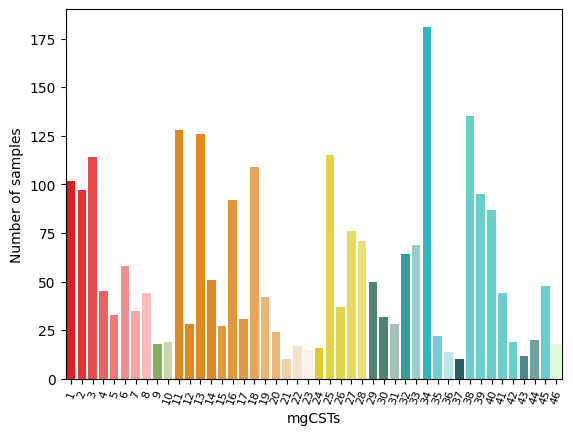

In [90]:
g = sns.barplot(x = 'mgCST', y = 'count_sample', data = data2 , legend = False, hue = 'color', palette=list(data2['color']))
fig1 = g.figure
plt.xlabel("mgCSTs")
plt.ylabel("Number of samples")
g.tick_params(axis='x', which='major', labelsize= 8, labelrotation=70)
# g.legend(title = 'mgCSTs',loc='upper center', bbox_to_anchor=(0.5, -0.2), fancybox=True, shadow=True, ncol = 5)
g.grid(False)